In [3]:
#Loading And Pre-Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [7]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

target = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


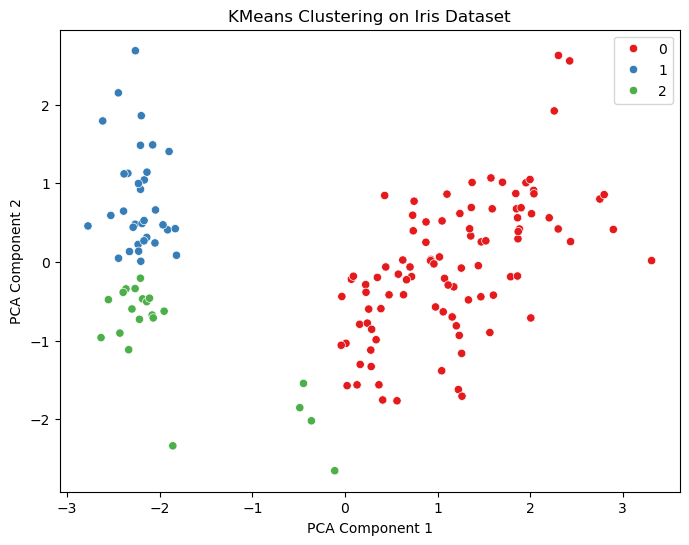

In [11]:
# Clustering Algorithm Implementation 
# A) KMeans Clustering 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Why KMeans?   
Iris has clear, compact clusters and numerical data — ideal for KMeans.



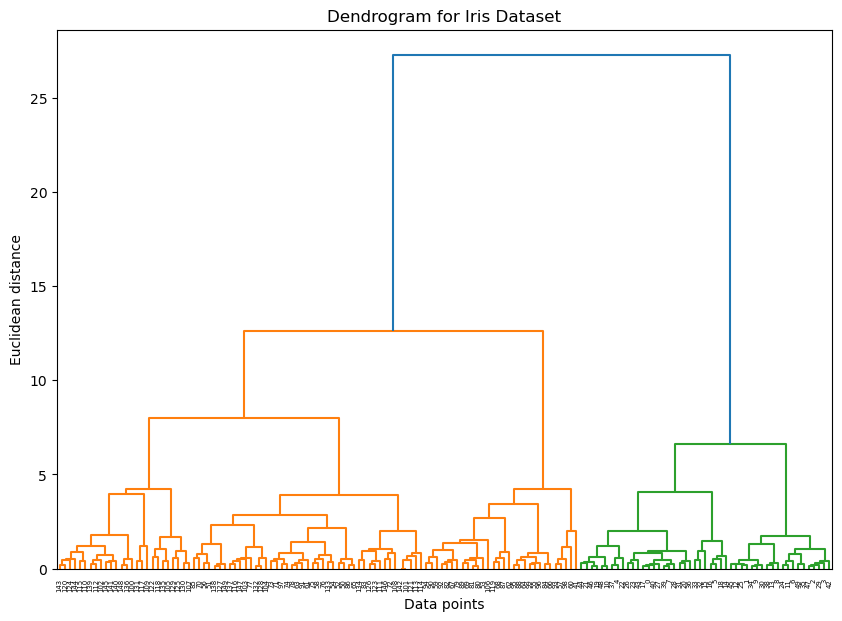

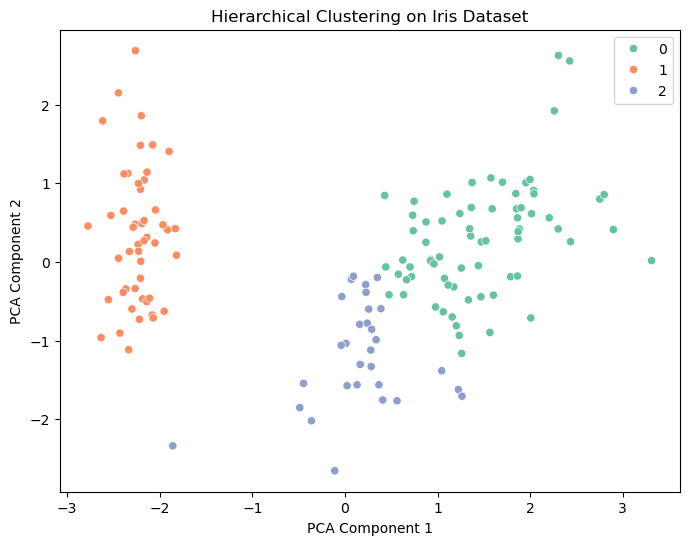

In [13]:
# B) Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(scaled_df)

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hc_labels, palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Why Hierarchical?  
It's useful for visualizing how clusters form step-by-step and works well with small datasets like Iris.

